### MODELAGEM PREDITIVA PARA SÉRIES TEMPORAIS

#### USUÁRIOS ATIVOS EM WEBSITE

In [12]:
!pip install -q -U statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as m

In [74]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [14]:
  # Formatação para os gráficos e tabelas
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Formatando os labels dos gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

In [15]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Bruno Ramos Lemos" 

Author: Bruno Ramos Lemos



In [40]:
schema = {
  'mes' : 'object',
  'usuarios_ativos': 'int64',
}

In [41]:
dados = pd.read_csv("./dataset.csv", header= None, names = schema)

In [42]:
dados.describe()

,usuarios_ativos
count,144.000000
mean,280.416667
std,119.825543
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [45]:
dados.tail()

,mes,usuarios_ativos
139,2024-08,606
140,2024-09,508
141,2024-10,461
142,2024-11,390
143,2024-12,432


In [47]:
dados.head(10)

,mes,usuarios_ativos
0,2013-01,110
1,2013-02,121
2,2013-03,135
3,2013-04,127
4,2013-05,128
5,2013-06,136
6,2013-07,149
7,2013-08,150
8,2013-09,138
9,2013-10,119


In [48]:
dados.shape

(144, 2)

In [49]:
dados.dtypes

mes                object
usuarios_ativos     int64
dtype: object

In [50]:
type(dados)

pandas.core.frame.DataFrame

In [51]:
dados.max()

mes                2024-12
usuarios_ativos        622
dtype: object

In [52]:
print('Inicio do Periodo: {} \nFim do Periodo: {}'.format(dados['mes'].min(), dados['mes'].max()))

Inicio do Periodo: 2013-01 
Fim do Periodo: 2024-12


In [53]:
dados['mes'] = pd.to_datetime(dados['mes'], format='%Y-%m')

In [54]:
dados.head()

,mes,usuarios_ativos
0,2013-01-01,110
1,2013-02-01,121
2,2013-03-01,135
3,2013-04-01,127
4,2013-05-01,128


In [55]:
dados_serie = dados.set_index('mes')

In [56]:
type(dados_serie)

pandas.core.frame.DataFrame

In [57]:
dados_serie

,usuarios_ativos
mes,
2013-01-01,110
2013-02-01,121
2013-03-01,135
2013-04-01,127
2013-05-01,128
...,...
2024-08-01,606
2024-09-01,508
2024-10-01,461


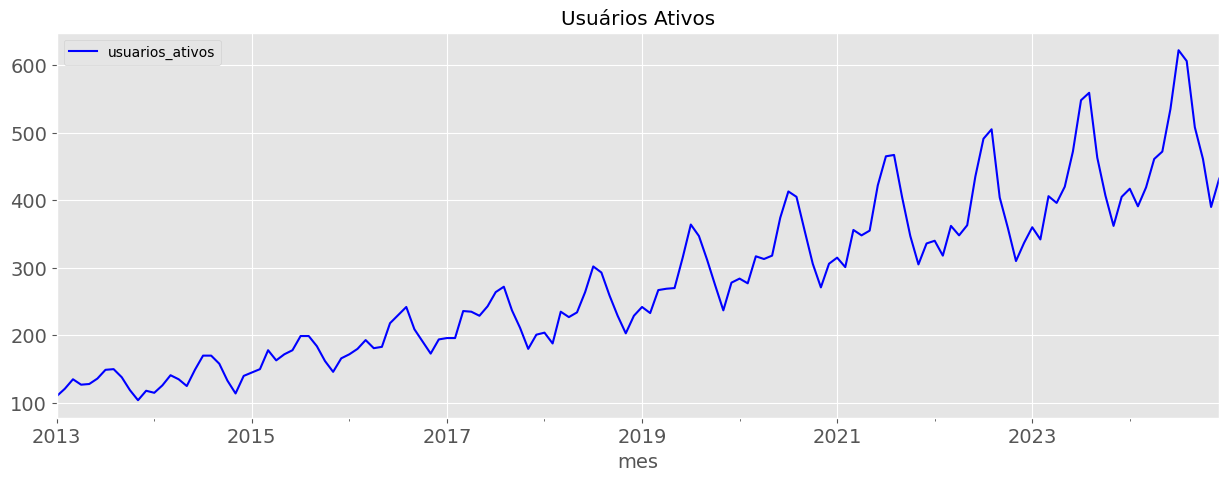

In [59]:
dados_serie.plot(figsize=(15, 5), title='Usuários Ativos', color='blue', fontsize=14)
plt.show()

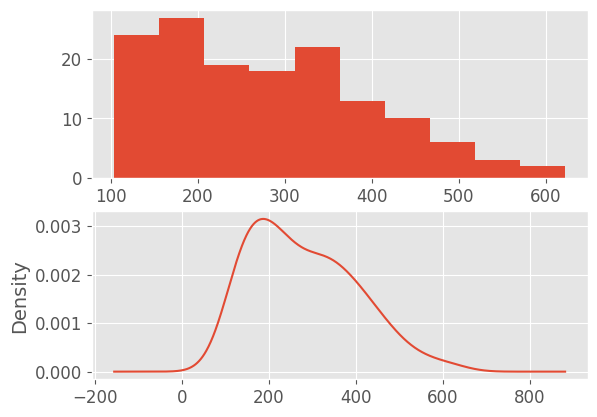

In [60]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
dados_serie.usuarios_ativos.hist()

# Subplot 2
plt.subplot(212)
dados_serie.usuarios_ativos.plot(kind = 'kde')
plt.show()

Text(0, 0.5, '\nUsuários Ativos')

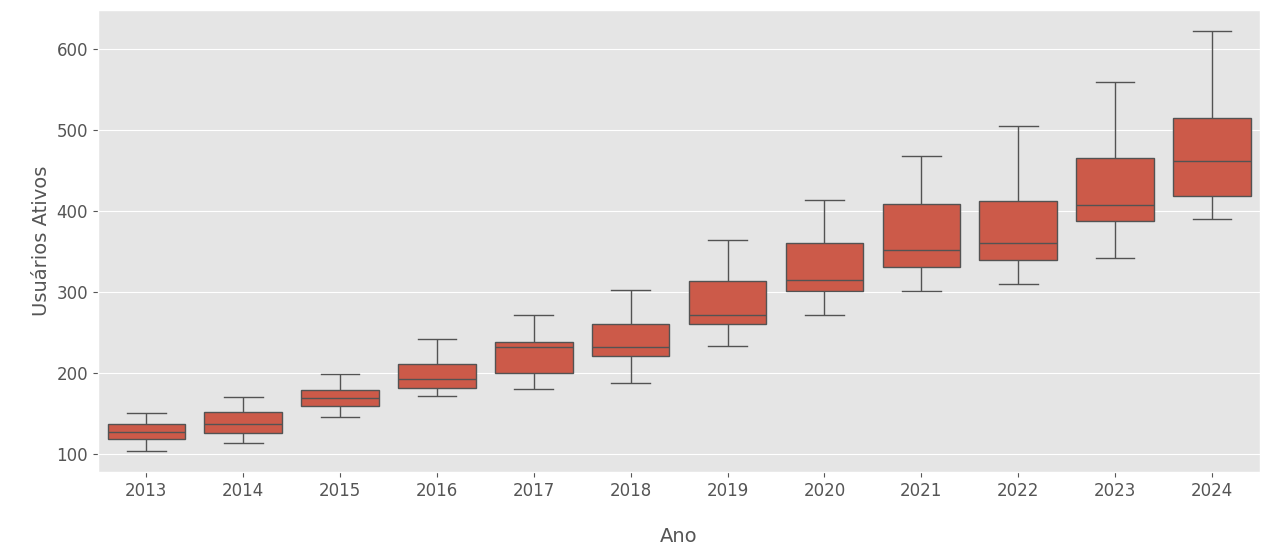

In [61]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize = (15,6))

# Define as variáveis
indice_ano = dados_serie.usuarios_ativos.index.year
valor = dados_serie.usuarios_ativos

# Cria um box plot para cada ano usando o Seaborn
# Observe que estamos extraindo o ano (year) do índice da série
sns.boxplot(x = indice_ano, y = valor, ax = ax, data = dados_serie)

plt.xlabel("\nAno")
plt.ylabel("\nUsuários Ativos")

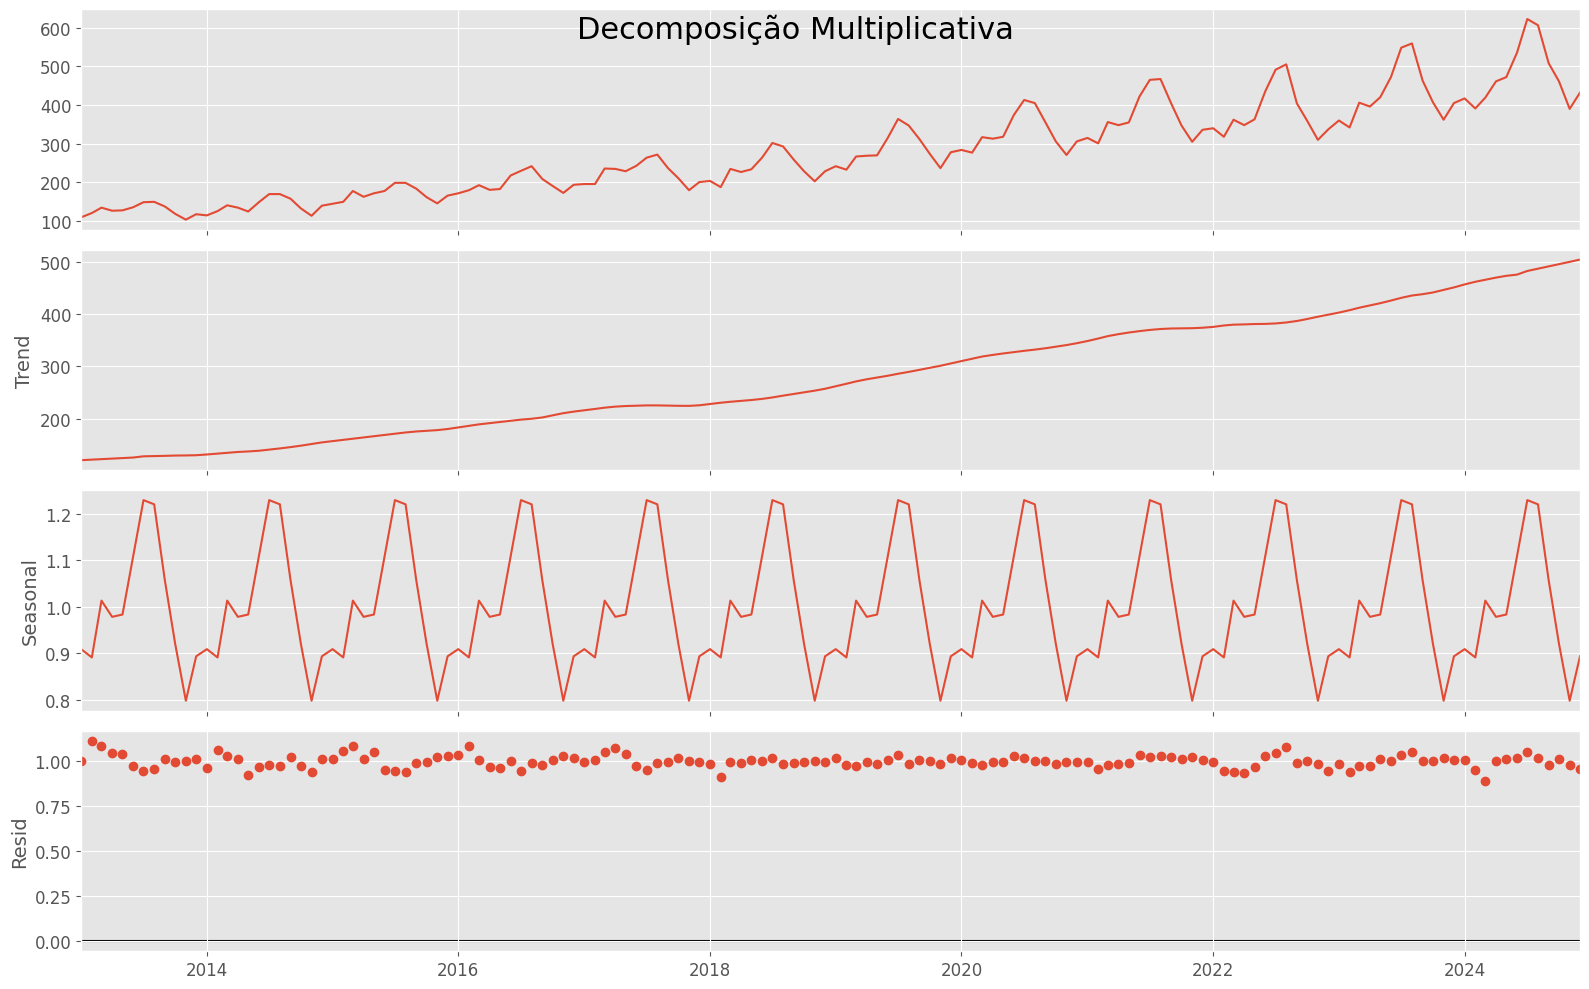

In [62]:
# Decomposição Multiplicativa
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(dados_serie, 
                                                        model = 'multiplicative', 
                                                        extrapolate_trend = 'freq')
# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
plt.show()

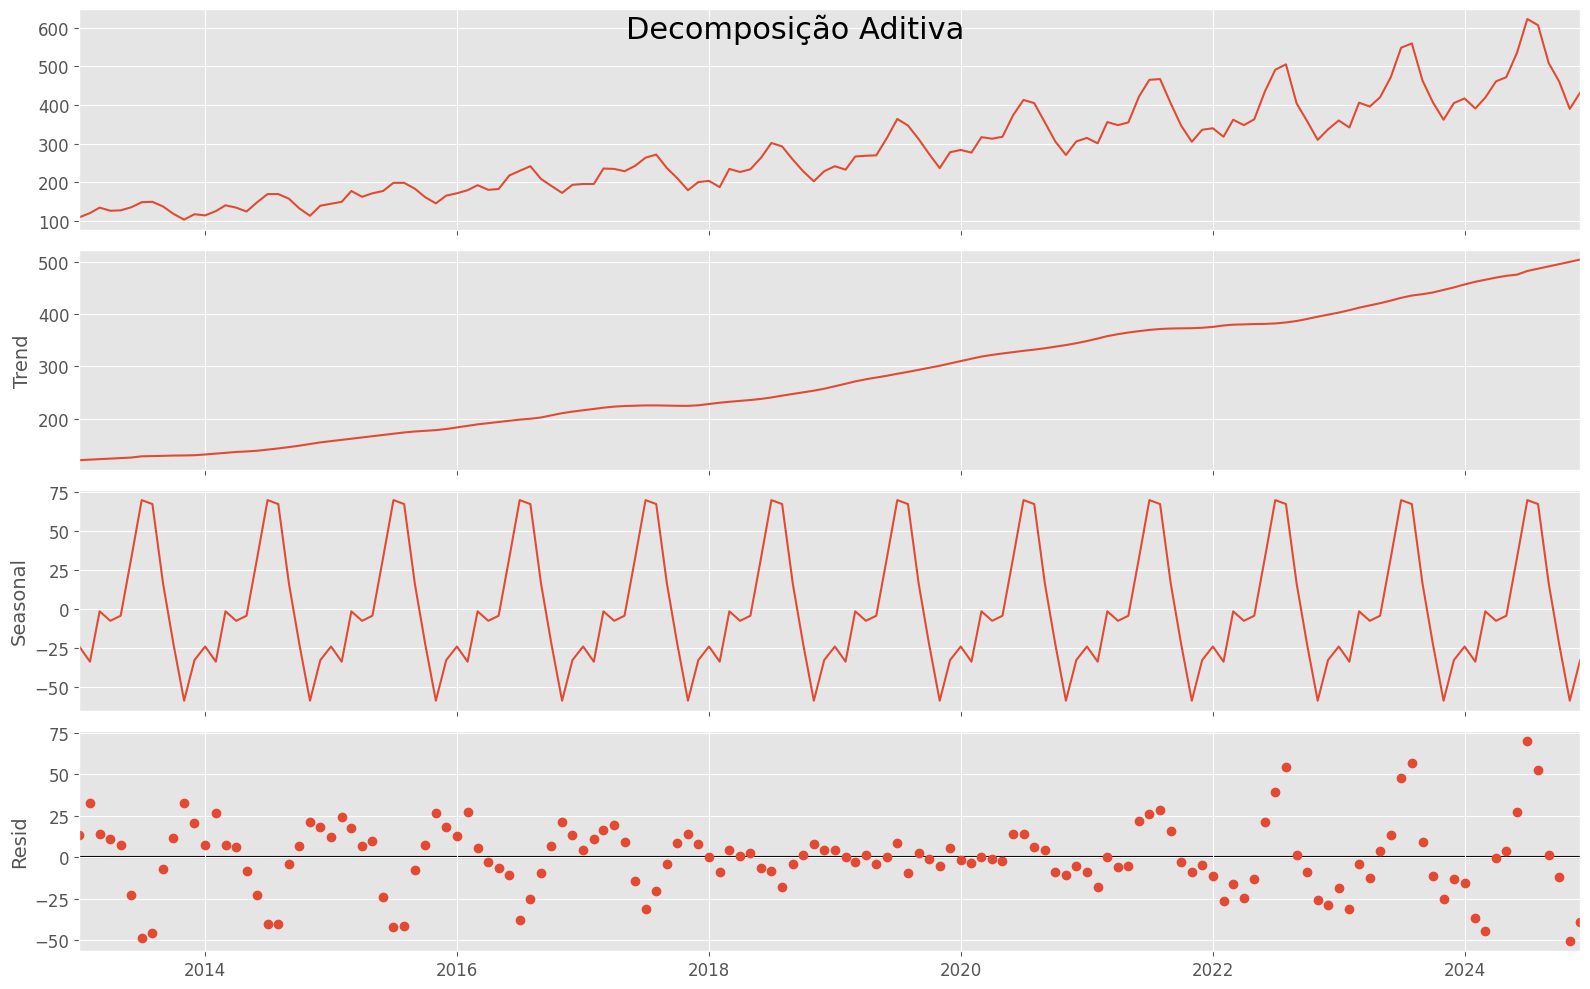

In [63]:
# Decomposição Aditiva
decomposicao_aditiva = sm.tsa.seasonal_decompose(dados_serie, 
                                                 model = 'aditive', 
                                                 extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

In [64]:
# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)
# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

In [65]:
dados_serie_reconstruida.head(10)

,Sazonalidade,Tendência,Resíduos,Valores_Observados
mes,,,,
2013-01-01,0.908801,120.743930,1.002440,110.0
2013-02-01,0.890967,121.750194,1.115460,121.0
2013-03-01,1.013081,122.756459,1.085538,135.0
2013-04-01,0.978227,123.762723,1.048997,127.0
2013-05-01,0.983212,124.768988,1.043413,128.0
2013-06-01,1.108024,125.775253,0.975876,136.0
2013-07-01,1.229174,128.125000,0.946104,149.0
2013-08-01,1.220071,128.541667,0.956450,150.0
2013-09-01,1.056932,129.000000,1.012144,138.0


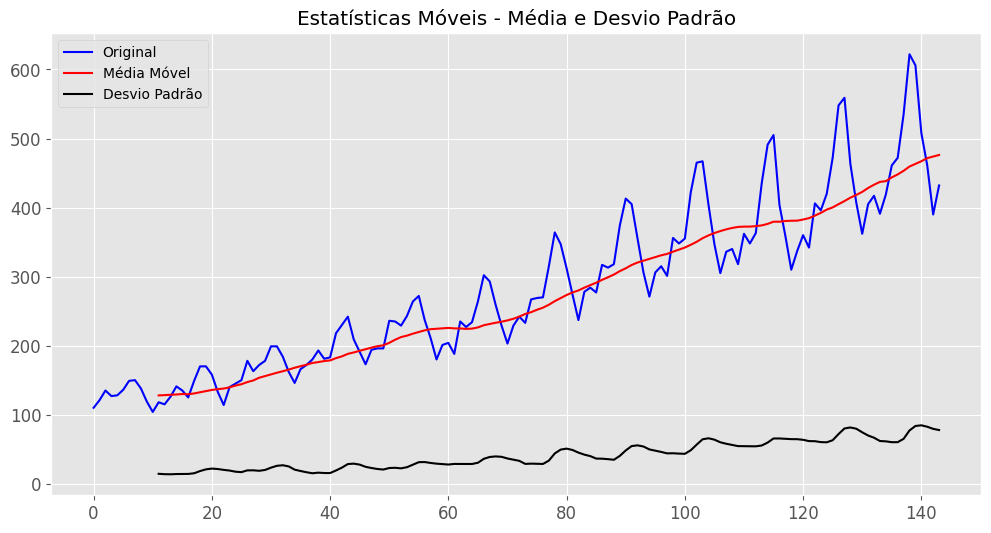

In [67]:
# Determinando estatísticas móveis
rolmean = dados['usuarios_ativos'].rolling(window = 12).mean()
rolstd = dados['usuarios_ativos'].rolling(window = 12).std()

# Prepara os dados para o plot
x = dados['mes'].values
y = dados['usuarios_ativos'].values

# Plot das estatísticas móveis
plt.figure(figsize = (12, 6))
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc='best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão')
plt.show()

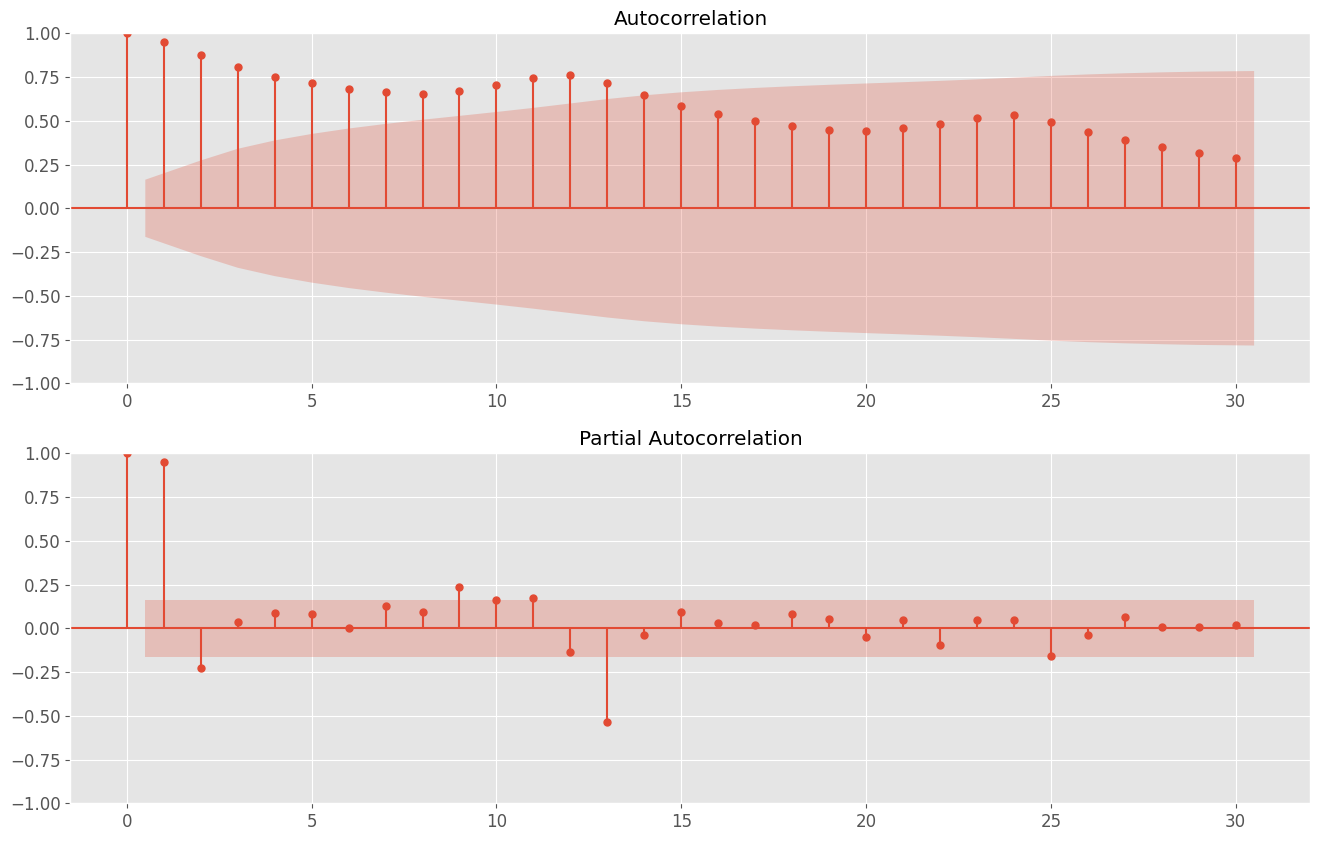

In [68]:
  # Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
plt.subplot(211)
plot_acf(dados_serie.usuarios_ativos, ax = plt.gca(), lags = 30)

# Plot do gráfico PACF
plt.subplot(212)
plot_pacf(dados_serie.usuarios_ativos, ax = plt.gca(), lags = 30, method = 'ywm')
plt.show()

In [69]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
dfteste = adfuller(dados_serie.usuarios_ativos, autolag = 'AIC')

# Formatando a saída
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.809204
Valor-p                           0.991783
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64


In [70]:
# Função para testar a estacionaridade
def dsa_testa_estacionaridade(serie, window = 12, title = 'Estatísticas Móveis e Teste Dickey-Fuller'):
    """
    Função para testar a estacionaridade de uma série temporal.
    
    Parâmetros:
    - serie: pandas.Series. Série temporal a ser testada.
    - window: int. Janela para cálculo das estatísticas móveis.
    - title: str. Título para os gráficos.
    """
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = window).mean()
    rolstd = serie.rolling(window = window).std()

    # Plot das estatísticas móveis
    plt.figure(figsize = (14, 6))
    plt.plot(serie, color = 'blue', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    plt.plot(rolstd, color = 'black', label = 'Desvio Padrão Móvel')
    plt.legend(loc = 'best')
    plt.title(title)
    plt.show(block = False)
    
    # Teste Dickey-Fuller
    print('\nResultado do Teste Dickey-Fuller:')
    dfteste = adfuller(serie, autolag = 'AIC')
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste', 
                                               'Valor-p', 
                                               'Número de Lags Consideradas', 
                                               'Número de Observações Usadas'])
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)' % key] = value
        
    print(dfsaida)
    
    # Conclusão baseada no valor-p
    if dfsaida['Valor-p'] > 0.05:
        print('\nConclusão:\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.\nEssa série provavelmente não é estacionária.')
    else:
        print('\nConclusão:\nO valor-p é menor que 0.05 e, portanto,temos evidências para rejeitar a hipótese nula.\nEssa série provavelmente é estacionária.')

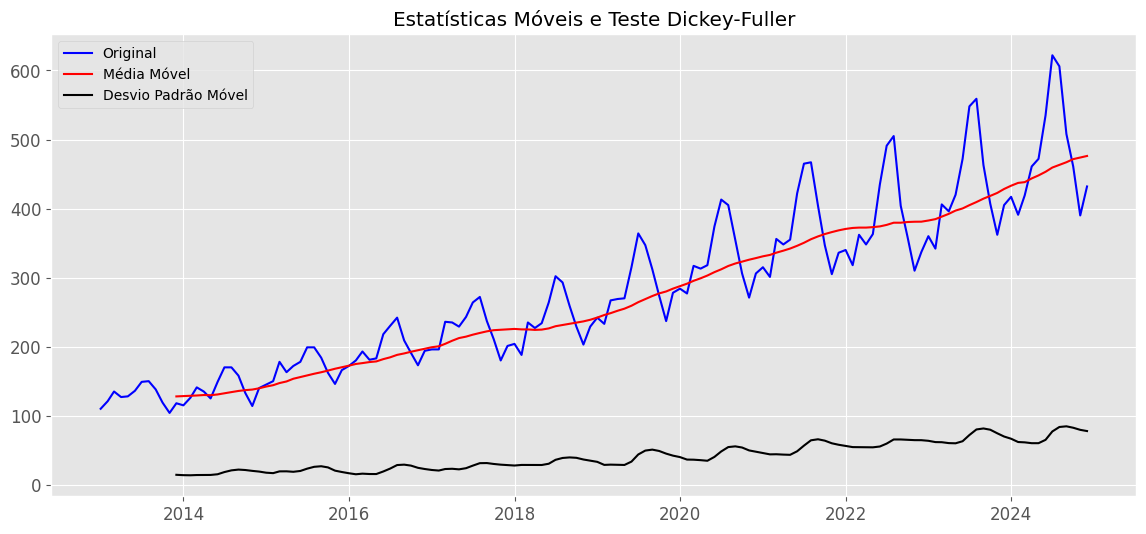


Resultado do Teste Dickey-Fuller:
Estatística do Teste              0.809204
Valor-p                           0.991783
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [71]:
dsa_testa_estacionaridade(dados_serie)

In [72]:
# Vamos aplicar uma transformação de log usando np.log() e gravamos o resultado em uma nova coluna do nosso dataset
dados['usuarios_ativos_log'] = np.log(dados['usuarios_ativos'])
dados.head()

,mes,usuarios_ativos,usuarios_ativos_log
0,2013-01-01,110,4.700480
1,2013-02-01,121,4.795791
2,2013-03-01,135,4.905275
3,2013-04-01,127,4.844187
4,2013-05-01,128,4.852030


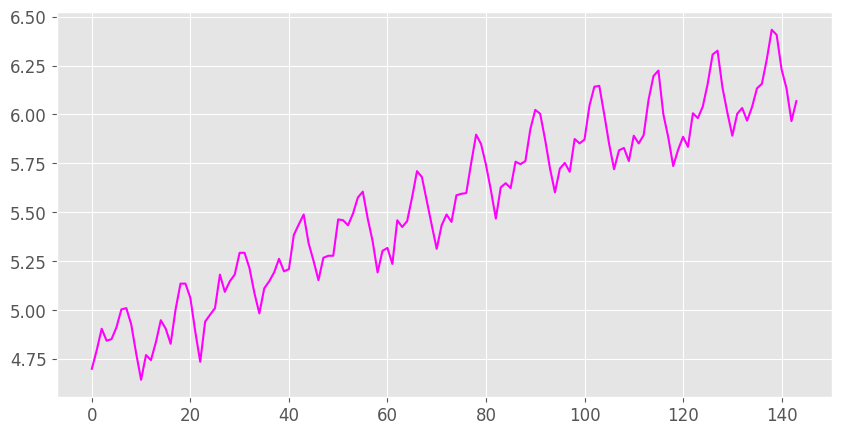

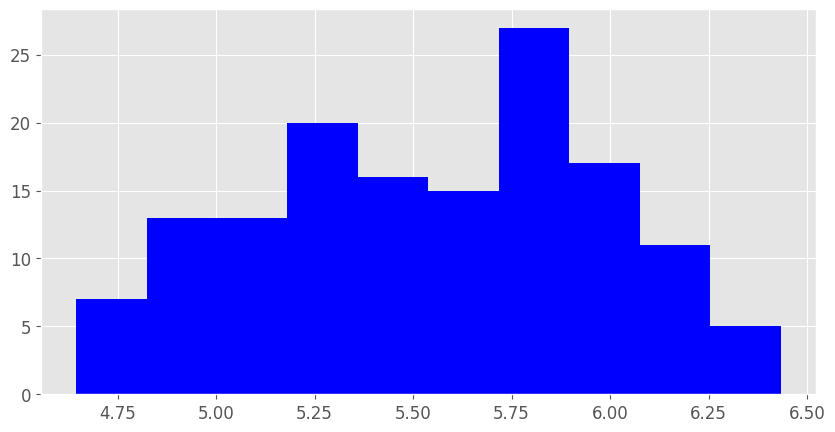

In [73]:
# Plot da série transformada
plt.figure(figsize = (10, 5))
plt.plot(dados['usuarios_ativos_log'], color = "magenta")
plt.show()

# Histograma da série transformada
plt.figure(figsize = (10, 5))
plt.hist(dados['usuarios_ativos_log'], color = "blue")
plt.show()

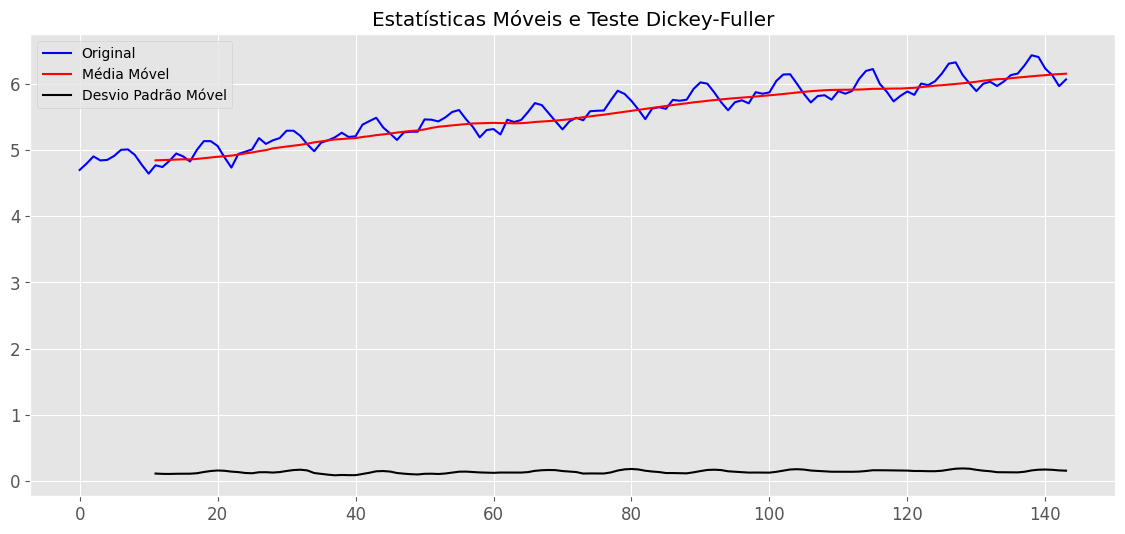


Resultado do Teste Dickey-Fuller:
Estatística do Teste             -1.682091
Valor-p                           0.440363
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [75]:
dsa_testa_estacionaridade(dados['usuarios_ativos_log'])

In [76]:
# Transformação de Raiz Quadrada com np.sqrt()
dados_sqrt = np.sqrt(dados['usuarios_ativos'])

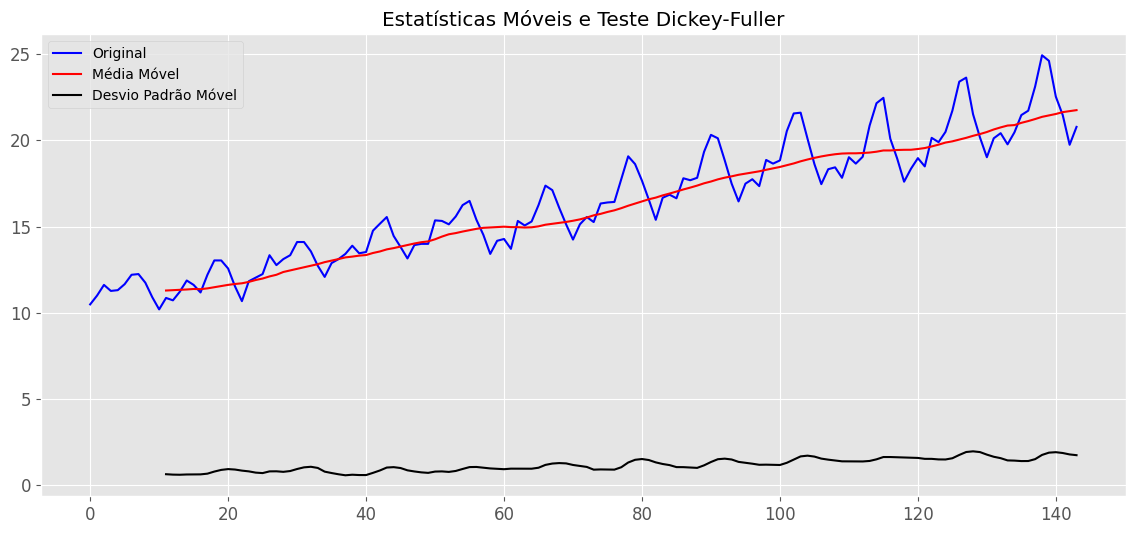


Resultado do Teste Dickey-Fuller:
Estatística do Teste             -0.335165
Valor-p                           0.920374
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [77]:
dsa_testa_estacionaridade(dados_sqrt)

In [78]:
dados['usuarios_ativos_box'] = boxcox(dados['usuarios_ativos'], lmbda = 0.0)

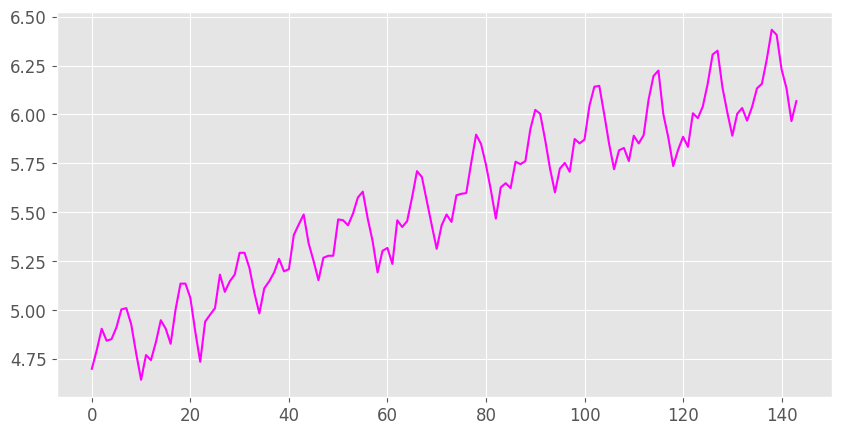

In [79]:
# Plot da série transformada
plt.figure(figsize = (10, 5))
plt.plot(dados['usuarios_ativos_box'], color = "magenta")
plt.show()

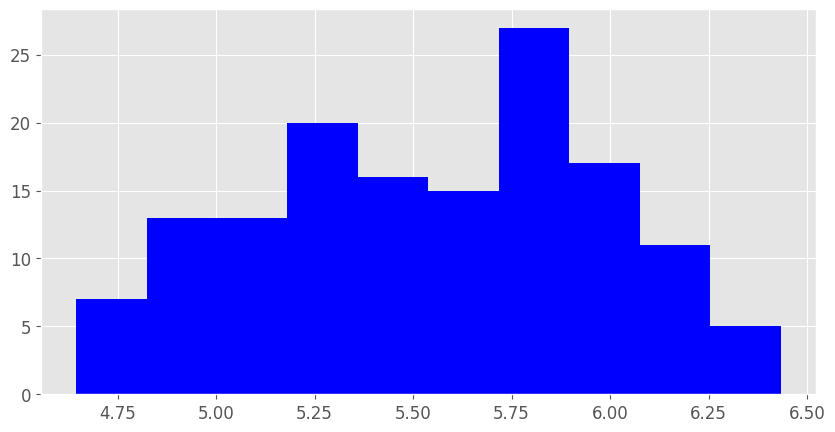

In [80]:
# Histograma
plt.figure(figsize = (10, 5))
plt.hist(dados['usuarios_ativos_box'], color = "blue")
plt.show()

In [81]:
# Aplicando Transformação Box-Cox
dados['usuarios_ativos_box_2'], lam_value = boxcox(dados['usuarios_ativos'])
print('Valor Ideal de Lambda: %f' % lam_value)
dados.head()

Valor Ideal de Lambda: 0.141909


,mes,usuarios_ativos,usuarios_ativos_log,usuarios_ativos_box,usuarios_ativos_box_2
0,2013-01-01,110,4.700480,4.700480,6.683589
1,2013-02-01,121,4.795791,4.795791,6.870559
2,2013-03-01,135,4.905275,4.905275,7.088477
3,2013-04-01,127,4.844187,4.844187,6.966470
4,2013-05-01,128,4.852030,4.852030,6.982076


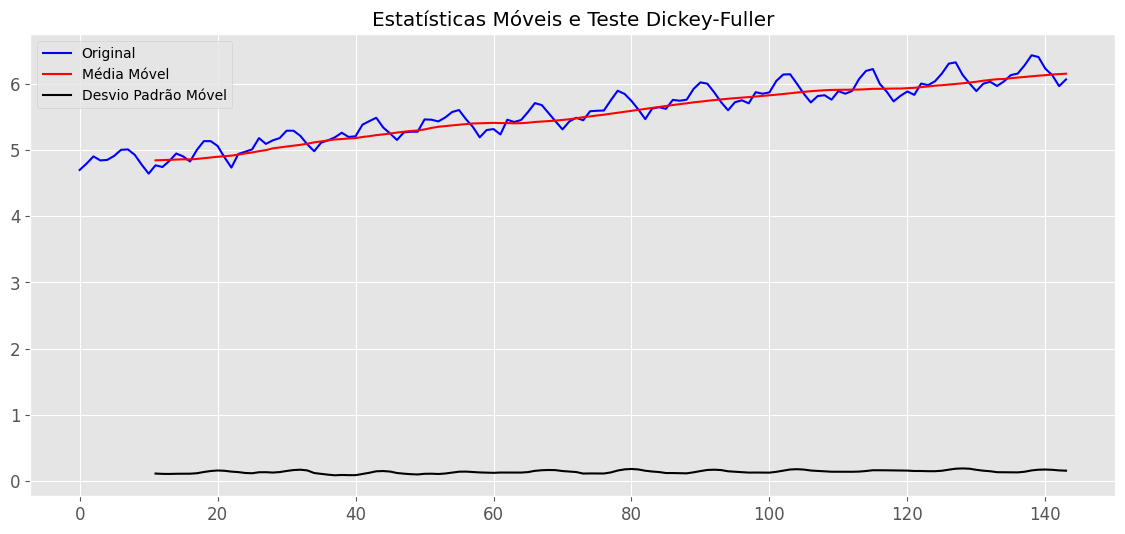


Resultado do Teste Dickey-Fuller:
Estatística do Teste             -1.682091
Valor-p                           0.440363
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [82]:
dsa_testa_estacionaridade(dados['usuarios_ativos_box'])

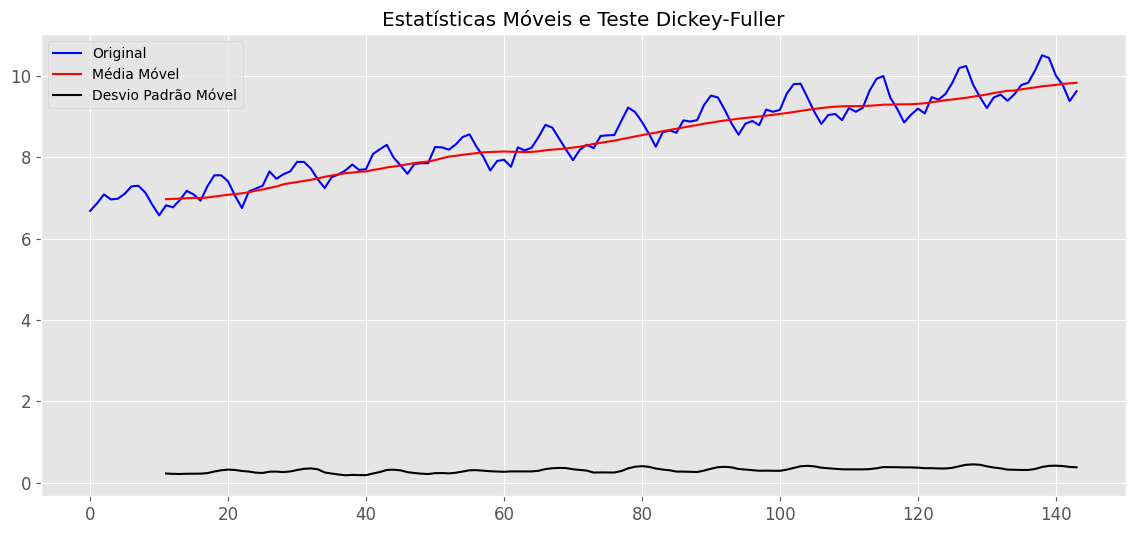


Resultado do Teste Dickey-Fuller:
Estatística do Teste             -1.313294
Valor-p                           0.623069
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:
O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [83]:
dsa_testa_estacionaridade(dados['usuarios_ativos_box_2'])